# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

# **`Concrete Strength Assingment`**

**Data Loading and Checking**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving compresive_strength_concrete.csv to compresive_strength_concrete.csv


In [ ]:
import io
concrete_data = pd.read_csv (io.BytesIO(uploaded['compresive_strength_concrete.csv']))

In [ ]:
concrete_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
concrete_data.tail()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [ ]:
concrete_data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [ ]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

**Check Missing data**

In [ ]:
missingdata = concrete_data.isnull().sum()
missingdata

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

**Checking relationship and dependency**

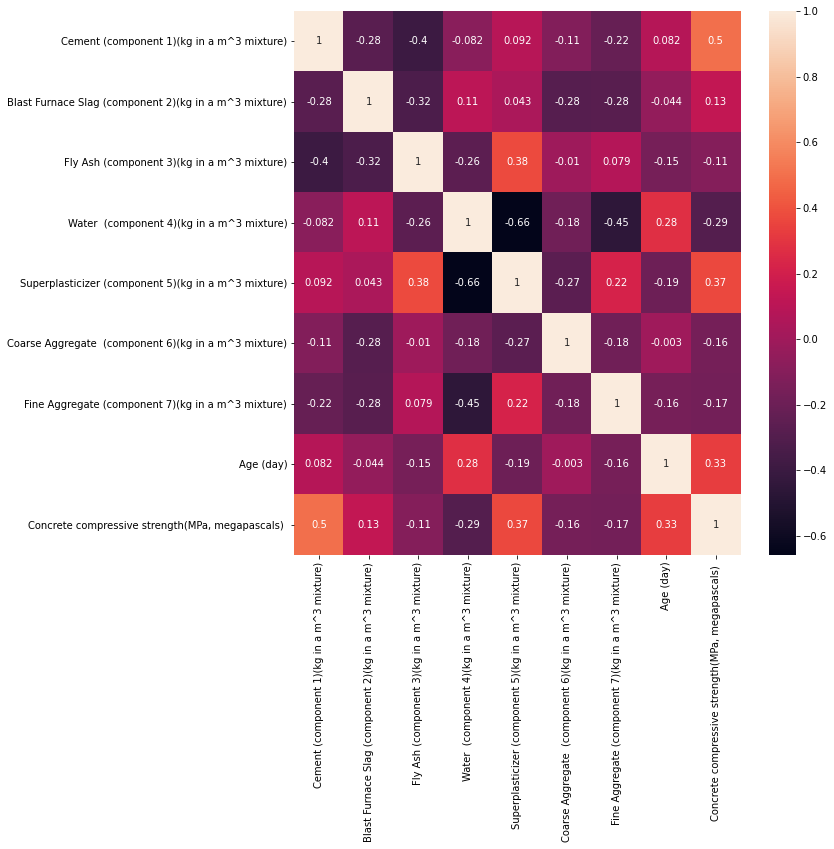

In [ ]:
import seaborn as sns
corre = concrete_data.corr()
top_corr_features = corre.index
plt.figure(figsize=(10,10))
g=sns.heatmap(concrete_data[top_corr_features].corr(),annot=True)
sns.color_palette("Spectral", as_cmap=True)

**Normalizing the data**

In [ ]:
mean = concrete_data.mean(axis=0)
concrete_data -= mean
std = concrete_data.std(axis=0)
concrete_data /= std

In [ ]:
concrete_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597,2.644123
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597,1.560663
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340,0.266498
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221,0.313188
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069,0.507732


**Splitting the data**

In [ ]:
X = concrete_data.iloc[:,:8]
y = concrete_data[['Concrete compressive strength(MPa, megapascals) ']]

In [ ]:
X

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069
...,...,...,...,...,...,...,...,...
1025,-0.045623,0.487998,0.564271,-0.092126,0.451190,-1.322363,-0.065861,-0.279597
1026,0.392628,-0.856472,0.959602,0.675872,0.702285,-1.993711,0.496651,-0.279597
1027,-1.269472,0.759210,0.850222,0.521336,-0.017520,-1.035561,0.080068,-0.279597
1028,-1.168042,1.307430,-0.846733,-0.279443,0.852942,0.214537,0.191074,-0.279597


In [ ]:
y

,"Concrete compressive strength(MPa, megapascals)"
0,2.644123
1,1.560663
2,0.266498
3,0.313188
4,0.507732
...,...
1025,0.506535
1026,-0.277627
1027,-0.725377
1028,-0.182450


In [ ]:
from sklearn.model_selection import train_test_split
train_sample, test_sample, train_labels, test_labels = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
print(train_sample.shape, train_labels.shape, test_sample.shape, test_labels.shape, X.shape, y.shape)

(721, 8) (721, 1) (309, 8) (309, 1) (1030, 8) (1030, 1)


In [ ]:
print (train_sample.shape[1], train_labels.shape[1])

8 1


**Creating Model**

In [ ]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(10, activation='relu', input_shape=(train_sample.shape[1],)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(8, activation='relu'))
  #model.add(layers.Dropout(0.2))
  model.add(layers.Dense(6))
  #model.add(layers.Dense(1))
  return model

In [ ]:
model = build_model()

In [ ]:
model

**Validation Data**

In [ ]:
X_val = train_sample[:206]
partial_X_train = train_sample[206:]
y_val = train_labels[:206]
partial_y_train = train_labels[206:]

In [ ]:
print (len(X_val), len(partial_X_train), len(y_val), len(partial_y_train))

206 515 206 515


In [ ]:
print (X_val.shape, partial_X_train.shape, y_val.shape, partial_y_train.shape)

(206, 8) (515, 8) (206, 1) (515, 1)


**Compilation**

In [ ]:
model.compile (optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                90        
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 54        
Total params: 232
Trainable params: 232
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history= model.fit(partial_X_train, partial_y_train, epochs= 100, batch_size=1, verbose=1, validation_data=(X_val, y_val))

Epoch 1/100
515/515 [==============================] - 1s 2ms/step - loss: 1.0501 - mae: 0.8293 - val_loss: 0.8889 - val_mae: 0.7647
Epoch 2/100
515/515 [==============================] - 1s 2ms/step - loss: 1.0206 - mae: 0.8083 - val_loss: 0.8130 - val_mae: 0.7349
Epoch 3/100
515/515 [==============================] - 1s 1ms/step - loss: 0.8032 - mae: 0.7263 - val_loss: 0.7049 - val_mae: 0.6858
Epoch 4/100
515/515 [==============================] - 1s 2ms/step - loss: 0.7534 - mae: 0.6975 - val_loss: 0.6059 - val_mae: 0.6383
Epoch 5/100
515/515 [==============================] - 1s 1ms/step - loss: 0.6519 - mae: 0.6658 - val_loss: 0.5551 - val_mae: 0.6112
Epoch 6/100
515/515 [==============================] - 1s 2ms/step - loss: 0.5990 - mae: 0.6308 - val_loss: 0.5084 - val_mae: 0.5834
Epoch 7/100
515/515 [==============================] - 1s 1ms/step - loss: 0.5846 - mae: 0.6332 - val_loss: 0.4748 - val_mae: 0.5582
Epoch 8/100
515/515 [==============================] - 1s 1ms/step - 

**MAE & Validation plots**

In [ ]:
y1= history.history['mae']
x1= history.history['val_mae']
x= range(100)

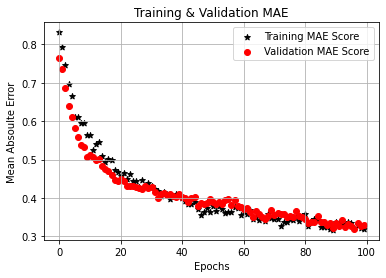

In [ ]:
plt.scatter(x, y1, label= "Training MAE Score", color= "black", marker= "*")
plt.scatter(x, x1, label= "Validation MAE Score", color= "red")
plt.xlabel('Epochs')
plt.ylabel('Mean Absoulte Error')
plt.title('Training & Validation MAE')
plt.legend()
plt.grid()
plt.show()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

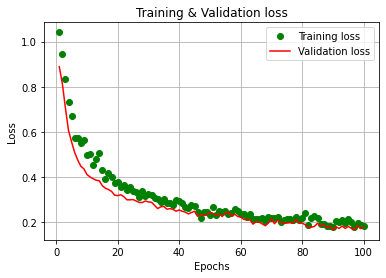

In [ ]:
plt.plot(epochs, loss,"go", label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation loss')
plt.legend()
plt.grid()
plt.show()

**Evaluation**

In [ ]:
model.evaluate(test_sample,test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 0.2251 - mae: 0.3639


[0.22513726353645325, 0.36394691467285156]

**Model Prediction**

In [ ]:
results= model.predict(test_sample)
results

array([[ 1.5089214 ,  1.5644127 ,  1.5445586 ,  1.5562319 ,  1.4987859 ,
         1.5312948 ],
       [ 1.3165479 ,  1.3198136 ,  1.3176423 ,  1.3188918 ,  1.3175626 ,
         1.3177972 ],
       [-0.41771474, -0.41730624, -0.4178914 , -0.41730306, -0.41751072,
        -0.41677433],
       ...,
       [ 0.09649363,  0.07020843,  0.07897779,  0.07326713,  0.10346785,
         0.0858068 ],
       [ 0.24281487,  0.24740225,  0.24636534,  0.24742162,  0.2401999 ,
         0.24121164],
       [ 0.00627682, -0.01656353, -0.00907779, -0.01377548,  0.01169534,
        -0.00200057]], dtype=float32)

In [ ]:
results[2]

array([-0.41771474, -0.41730624, -0.4178914 , -0.41730306, -0.41751072,
       -0.41677433], dtype=float32)

In [ ]:
results[1]

array([1.3165479, 1.3198136, 1.3176423, 1.3188918, 1.3175626, 1.3177972],
      dtype=float32)

In [ ]:
test_labels

,"Concrete compressive strength(MPa, megapascals)"
173,1.932392
134,2.123943
822,-0.636785
264,-0.975590
479,0.131813
...,...
359,-0.502699
12,0.430513
287,-0.014843
985,-0.120794


In [ ]:
test_mse_score, test_mae_score = model.evaluate(test_sample, test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 0.2251 - mae: 0.3639


In [ ]:
print (test_mse_score, test_mae_score)

0.22513726353645325 0.36394691467285156


In [ ]:
prediction = model.predict(test_sample)
prediction

array([[ 1.5089214 ,  1.5644127 ,  1.5445586 ,  1.5562319 ,  1.4987859 ,
         1.5312948 ],
       [ 1.3165479 ,  1.3198136 ,  1.3176423 ,  1.3188918 ,  1.3175626 ,
         1.3177972 ],
       [-0.41771474, -0.41730624, -0.4178914 , -0.41730306, -0.41751072,
        -0.41677433],
       ...,
       [ 0.09649363,  0.07020843,  0.07897779,  0.07326713,  0.10346785,
         0.0858068 ],
       [ 0.24281487,  0.24740225,  0.24636534,  0.24742162,  0.2401999 ,
         0.24121164],
       [ 0.00627682, -0.01656353, -0.00907779, -0.01377548,  0.01169534,
        -0.00200057]], dtype=float32)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


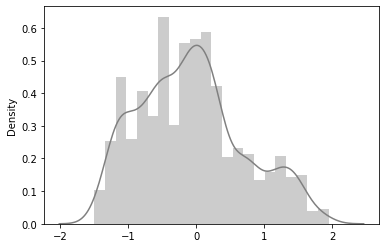

In [ ]:
sns.distplot(prediction, kde=True, color='grey')